In [7]:
import scipy as sc
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import scipy.fftpack as sft

In [8]:
# Creating X grid
xmin = -1000
xmax = 1000.2
dx = 0.2
x = np.arange(xmin,xmax,dx)

In [18]:
k0 =1                                      # Conisdering 1 Atomic unit of velocity
psi = np.exp((-x**2)/2)*np.exp(1j*k0*x)    #Travelling Gaussian function at t=0
prob_dens = abs(psi)**2
Norm = sci.simps(prob_dens,x)
print(Norm)
Norm_cons = np.sqrt(1/(Norm))
psi_N = Norm_cons*psi
pd_1 = abs(psi_N)**2
prob= sci.simps(pd_1,x)
print(Prob)

1.7724538509055157
(1.1419713938389982-1.1102230246251565e-16j)


In [19]:
# Checking whether the wavefucntion has normalised or not.
N_prob_dens = abs(psi_N**2)
prob = sci.simps(N_prob_dens,x)
print(prob)                      

1.0


C:\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-5.0, 5.0)

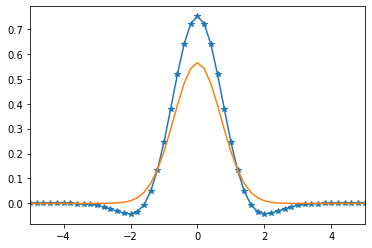

In [20]:
# Plotting normalised wavefuncion and prob density curves
plt.plot(x,psi_N,'*-')
plt.xlim(-5,5)
plt.plot(x,N_prob_dens)
plt.xlim(-5,5)

In [21]:
# Creating K grid or momentum space for FT 
N = len(x)
xi = sft.fftfreq(N,dx)
k = 2*np.pi*xi

(-10.0, 30.0)

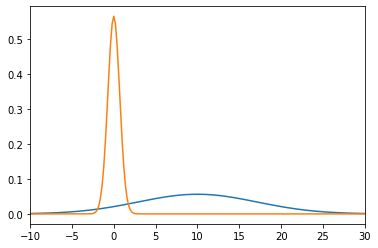

In [22]:
KE_k = 0.5*k**2          # Defining KE in a.u.
Nt = 100                # Total number of steps(Iteration in the loop) for the time in a.u.
dt = 0.1                # Delta Time for every evolution in a.u.
for i in np.arange(Nt):       # This arange(N), means start at 0 with interval 1, endpoint at N
    y_k = sft.fft(psi_N)       # FT
    y_k_dt =np.exp(-1.0j*KE_k*dt)*y_k     #Applying Time evolution operator on fourier transformed wf in momentum space
    psi_N = sft.ifft(y_k_dt)
    
prob_dens_final = abs(psi_N)**2
plt.plot(x,prob_dens_final)
plt.xlim(-10,30)
plt.plot(x,N_prob_dens)             # We observe that the centre of the wavefunction has moved away with time
plt.xlim(-10,30)

In [23]:
# Let's Test Ehrenfest Theorem, and quantify the travelling curve with resepct to their mean and width.
#By changing Time(Nt), we can observe the wavepacket at different instances.

x_avg = sci.simps(prob_dens_final*x,x)
x_sqr_avg = sci.simps(prob_dens_final*x**2,x)
variance = np.sqrt(x_sqr_avg - x_avg**2)
print("Half width at 60 percent maxima =",variance)
print("Expectation Value of Gaussian Curve=", x_avg)

Half width at 60 percent maxima = 7.1063352017790535
Expectation Value of Gaussian Curve= 10.000000000004851


In [24]:
# By noting the mean value and width of curve at different time, we can plot the graph of , Mean Posi vs Time, where we can 
#  clearly explain the movement of centre of the curve and spread of the curve with respect to time.